In [48]:
import pandas as pd
import re
df_train = pd.read_csv("input/train.csv")
df_test = pd.read_csv("input/test.csv")
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
print df_train.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [125]:
# 每个feature的意义，feature的类型,比较有用的代码如下
df_train['Pclass'].unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,  28.  ,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,  18.  ,
         3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,  11.  ,
        45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,  33.  ,
        23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,  14.5 ,
        70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,  40.5 ,
        44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,  20.5 ,
        62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,  60.  ,
        10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,  80.  ,
        70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [137]:
# 看是否存在missing value
df_train.loc[df_train.Cabin.isnull(),['PassengerId','Cabin']].head()

,PassengerId,Cabin
0,1,NaN
2,3,NaN
4,5,NaN
5,6,NaN
7,8,NaN


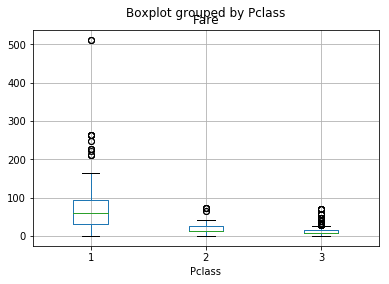

In [109]:
# 每个特征下的数据分布，可以用boxplot或者hist来看
%matplotlib inline
import matplotlib.pyplot as plt
df_train.boxplot(column='Fare', by = 'Pclass')

Text(0,0.5,u'Count of Passengers')

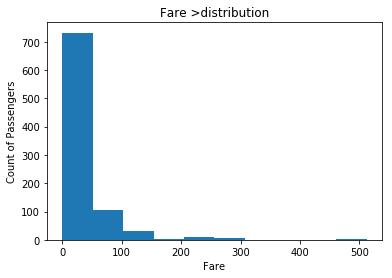

In [110]:
plt.hist(df_train['Fare'], bins = 10, range =(df_train['Fare'].min(),df_train['Fare'].max()))
plt.title('Fare >distribution')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')

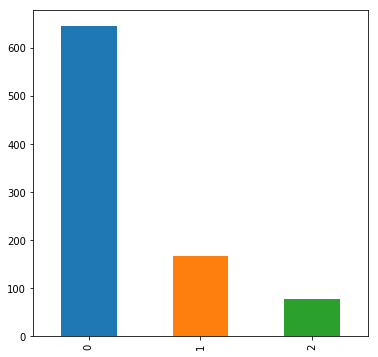

In [117]:
#如果变量是categorical的，想看distribution，则可以：
df_train.Embarked.value_counts().plot(kind='bar', figsize=(6,6))

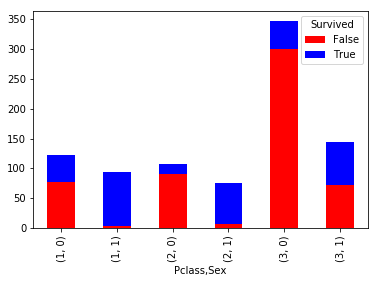

In [119]:
# 如果想看几个feature之间的联立情况，则可以用pandas的groupby,
temp = pd.crosstab([df_train.Pclass, df_train.Sex], df_train.Survived.astype(bool))
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [51]:
print df_train['Sex'].unique()

['male' 'female']


In [52]:
df_train.loc[df_train['Sex']=='male','Sex'] = 0
df_train.loc[df_train['Sex']=='female','Sex'] = 1
print df_train['Sex'].unique()

[0 1]


In [53]:
print df_train["Embarked"].unique()

['S' 'C' 'Q' nan]


In [54]:
pd.value_counts(df_train['Embarked'],dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [55]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')
print df_train["Embarked"].unique()

['S' 'C' 'Q']


In [134]:
decodeValue=pd.get_dummies(df_train.Embarked)
decodeValue[0:3]

,0,1,2
0,1,0,0
1,0,1,0
2,1,0,0


In [56]:
df_train.loc[df_train['Embarked']=='S','Embarked'] = 0
df_train.loc[df_train['Embarked']=='C','Embarked'] = 1
df_train.loc[df_train['Embarked']=='Q','Embarked'] = 2
pd.value_counts(df_train['Embarked'],dropna=False)

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.model_selection import StratifiedKFold

In [58]:
predictors=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [59]:
print(df_train.shape)

(891, 12)


In [60]:
alg=LinearRegression()
kf=KFold(df_train.shape[0],n_folds=3,random_state=1)

In [61]:
for train, test in kf:
    print(train,test)

(array([297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309,
       310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322,
       323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335,
       336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348,
       349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361,
       362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374,
       375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387,
       388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400,
       401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 4

In [62]:
skf = StratifiedKFold(n_splits=3, shuffle=False)

In [63]:
predictions=[]
for train,test in kf:
    train_predictors=(df_train[predictors].iloc[train,:])
    train_target=df_train['Survived'].iloc[train]
    alg.fit(train_predictors,train_target)
    test_predictions=alg.predict(df_train[predictors].iloc[test,:])
    predictions.append(test_predictions)

In [82]:
import numpy as np
predictions_new=np.concatenate(predictions,axis=0)
predictions_new[predictions_new>.5]=1
predictions_new[predictions_new<=.5]=0
accuracy=sum(predictions_new[predictions_new==df_train['Survived']])/ len(predictions_new)
print accuracy

0.261503928171


In [66]:
predictions[:3]

[array([ 0.09218937,  0.88721783,  0.63441057,  0.86406875,  0.06393595,
         0.19192583,  0.28213429,  0.1168794 ,  0.63896657,  0.862258  ,
         0.71315024,  0.79143039,  0.14427644,  0.02054778,  0.69870672,
         0.64370722,  0.16317002,  0.26709815,  0.56260706,  0.66925066,
         0.22524468,  0.23496195,  0.7839266 ,  0.42688044,  0.6069716 ,
         0.54809446,  0.14702227,  0.28482114,  0.7143485 ,  0.10147991,
         0.41053512,  0.91553746,  0.71439184,  0.06440761,  0.41489722,
         0.30471716,  0.14702086,  0.13892041,  0.59059209,  0.7012442 ,
         0.51726273,  0.75035534,  0.14679723,  0.92830187,  0.76255279,
         0.10142818,  0.14792009,  0.71439184,  0.05888638,  0.63230258,
         0.04221172,  0.13900428,  0.82647448,  0.73796587,  0.27063546,
         0.42688044,  0.82765747,  0.14434284,  0.87691192, -0.01778128,
         0.17915705,  0.88061963,  0.27808982,  0.10937186,  0.47480752,
         0.10818223,  0.78480921,  0.14959614,  0.5

In [67]:
predictions_new[:3]

array([ 0.,  1.,  1.])

In [68]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
alg=LogisticRegression(random_state=1)
scores=cross_validation.cross_val_score(alg,df_train[predictors],df_train['Survived'],cv=3)
print(scores.mean())

0.787878787879


In [69]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
alg=LinearRegression()
scores=cross_validation.cross_val_score(alg,df_train[predictors],df_train['Survived'],cv=3)
print(scores.mean())

0.374682056691


In [103]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
predictors=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
alg=RandomForestClassifier(random_state=1,n_estimators=40,min_samples_split=9,min_samples_leaf=2)
kf=cross_validation.KFold(df_train.shape[0],n_folds=3,random_state=1)
scores=cross_validation.cross_val_score(alg,df_train[predictors],df_train['Survived'],cv=kf)
print(scores.mean())

0.828282828283


In [102]:
from sklearn.grid_search import GridSearchCV
from pprint import pprint
seed=1
clf=RandomForestClassifier(random_state=seed)
parameters = {'n_estimators': [10*x for x in xrange(3,6)], 'min_samples_split':[x for x in xrange(8,10)],'min_samples_leaf':[x for x in xrange(1,5)]}
kf=cross_validation.KFold(df_train.shape[0],n_folds=3,random_state=1)
# grid_search = GridSearchCV(estimator=clf,param_grid=parameters, cv=10, scoring='accuracy')
grid_search = GridSearchCV(estimator=clf,param_grid=parameters, cv=kf, scoring='accuracy')
print("parameters:")
pprint(parameters)
grid_search.fit(df_train[predictors],df_train['Survived'])
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

parameters:
{'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
 'n_estimators': [30, 40, 50]}
Best score: 0.828
Best parameters set:
	min_samples_leaf: 2
	min_samples_split: 9
	n_estimators: 40


In [98]:
[x for x in xrange(2,10,3)]

[2, 5, 8]

In [95]:
[x for x in range(5)]

[0, 1, 2, 3, 4]

In [71]:
df_train['FamilySize']=df_train['SibSp'] + df_train['Parch']
df_train['NameLength']=df_train['Name'].apply(lambda x:len(x))

In [72]:
import re
def getTitle(Name):
    title_search=re.search(' ([A-Za-z]+)\.',Name)
    if title_search:
        return title_search.group(1)
    return ""
titles=df_train['Name'].apply(getTitle)
print(pd.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64


In [73]:
title_mapping={
"Mr":1,
"Miss":2,
"Mrs":3,
"Master":4,
"Dr":5,
"Rev":6,
"Col":7,
"Major":8,
"Mlle":9,
"Countess":10,
"Ms":11,
"Lady":12,
"Jonkheer":13,
"Don":14,
"Mme":15,
"Capt":16,
"Sir":17,
}
for k, v in title_mapping.items():
    titles[titles==k]=v
print(pd.value_counts(titles))

1     517
2     182
3     125
4      40
5       7
6       6
8       2
7       2
9       2
16      1
10      1
11      1
12      1
13      1
14      1
15      1
17      1
Name: Name, dtype: int64


In [74]:
df_train['Title']=titles


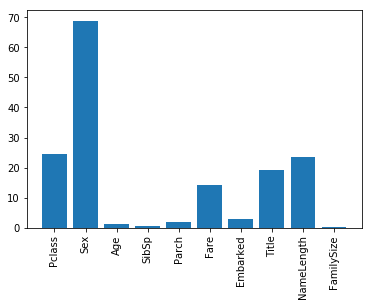

In [75]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
%matplotlib inline

predictors=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title','NameLength','FamilySize']

selector=SelectKBest(f_classif,k=5)
selector.fit(df_train[predictors],df_train['Survived'])

scores=-np.log10(selector.pvalues_)

plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation='vertical')
plt.show()


In [76]:
predictors=['Pclass','Sex','Fare','Title']
alg=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=8,min_samples_leaf=4)
kf=cross_validation.KFold(df_train.shape[0],n_folds=3,random_state=1)
scores=cross_validation.cross_val_score(alg,df_train[predictors],df_train['Survived'],cv=kf)
print(scores.mean())

0.818181818182


In [81]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

algorithms=[
    [
        GradientBoostingClassifier(random_state=1,n_estimators=25,max_depth=3),
        ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title','NameLength','FamilySize']
    ],
    [
        LogisticRegression(random_state=1),
        ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
    ],
    [
        RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=8,min_samples_leaf=4),
        ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title','NameLength','FamilySize']
    ],
]

kf=KFold(df_train.shape[0],n_folds=3,random_state=1)

predictions=[]
for train, test in kf:
    train_target=df_train['Survived'].iloc[train]
    full_test_predictions=[]
    for alg, predictors in algorithms:
        alg.fit(df_train[predictors].iloc[train,:],train_target)
        test_predictions=alg.predict_proba(df_train[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
#     test_predictions=(full_test_predictions[0]*3+full_test_predictions[2]*1)/4
    test_predictions=full_test_predictions[1]*1.0
    test_predictions[test_predictions<=0.5]=0
    test_predictions[test_predictions>0.5]=1
    predictions.append(test_predictions)

predictions_new=np.concatenate(predictions,axis=0)
accuracy=sum(predictions_new[predictions_new==df_train['Survived']])/ len(predictions_new)
print accuracy                                    

0.261503928171


In [ ]:
from sklearn.grid_search import GridSearchCV
from pprint import pprint
seed=1

algorithms=[
    [
        GradientBoostingClassifier(random_state=1,n_estimators=25,max_depth=3),
        ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title','NameLength','FamilySize']
    ],
    [
        LogisticRegression(random_state=1),
        ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
    ],
    [
        RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=8,min_samples_leaf=4),
        ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title','NameLength','FamilySize']
    ],
]

for alg, predictors in algorithms:

clf=RandomForestClassifier(random_state=seed)
parameters = {'n_estimators': [10*x for x in xrange(3,6)], 'min_samples_split':[x for x in xrange(8,10)],'min_samples_leaf':[x for x in xrange(1,5)]}
kf=cross_validation.KFold(df_train.shape[0],n_folds=3,random_state=1)
# grid_search = GridSearchCV(estimator=clf,param_grid=parameters, cv=10, scoring='accuracy')
grid_search = GridSearchCV(estimator=clf,param_grid=parameters, cv=kf, scoring='accuracy')
print("parameters:")
pprint(parameters)
grid_search.fit(df_train[predictors],df_train['Survived'])
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))